In [1]:
import pandas as pd

# Chargement des données nettoyées
X_clean = pd.read_csv('X_clean.csv')
y = pd.read_csv('y.csv')

# Vérification
print("✅ Dimensions de X_clean :", X_clean.shape)
print("✅ Dimensions de y :", y.shape)

/tmp/ipykernel_1541/3013409453.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  X_clean = pd.read_csv('X_clean.csv')


✅ Dimensions de X_clean : (221210, 34)
✅ Dimensions de y : (221210, 1)


Étape suivante : Analyse exploratoire (EDA)

1_ Analyse de corrélation pour les variables quantitatives
️2_ Visualisation avec une Heatmap
3_ Analyse des relations avec la cible (nutrition_grade_fr)

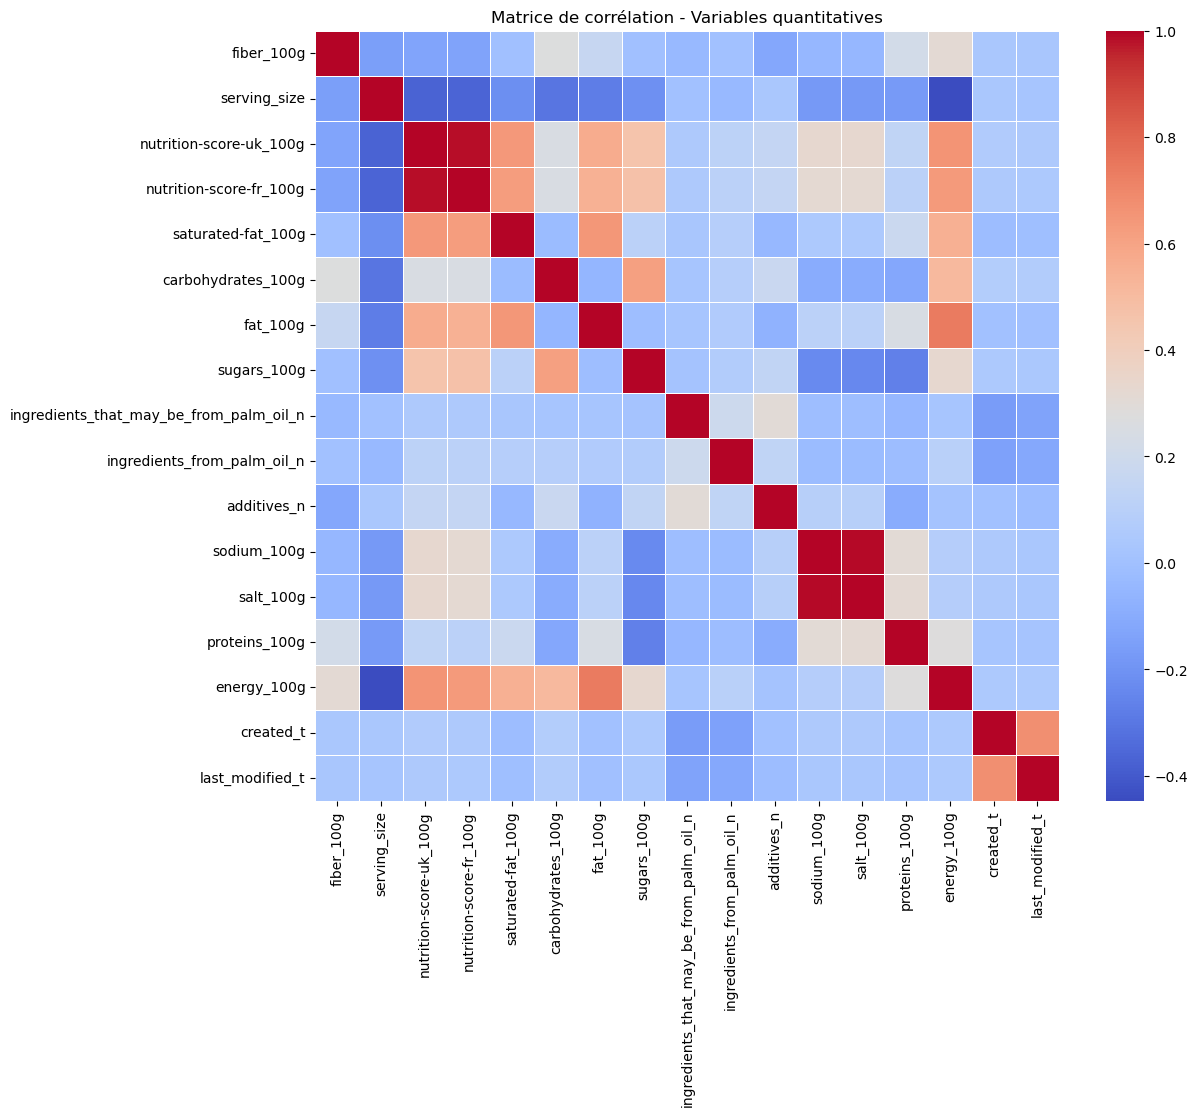

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables numériques
quantitative_vars = X_clean.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix = quantitative_vars.corr()

# Taille de l'affichage
plt.figure(figsize=(12, 10))

# Heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation - Variables quantitatives')
plt.show()

Certaines variables sont fortement corrélées, ce qui peut créer des redondances inutiles dans notre modèle.
L'objectif ici est d'optimiser notre dataset en réduisant le bruit tout en conservant l'information essentielle.
donc: 1_ Réduire le bruit dans les données.
      2_ Optimiser le modèle en supprimant les redondances.
      3_ Conserver l'essentiel de l'information.

1_ sodium_100g peut être supprimé car il est presque une copie de salt_100g.
2_ saturated-fat_100g peut potentiellement être supprimé au profit de fat_100g (à valider).
3_ ingredients_that_may_be_from_palm_oil_n peut être fusionné avec ingredients_from_palm_oil_n.

Avant de supprimer, on va mesurer l'impact avec un test de corrélation plus précis.

In [3]:
import pandas as pd

# 1️⃣ Vérification des corrélations (plus précises) :
print("🔎 Corrélation entre sodium_100g et salt_100g :", X_clean[['sodium_100g', 'salt_100g']].corr())
print("🔎 Corrélation entre saturated-fat_100g et fat_100g :", X_clean[['saturated-fat_100g', 'fat_100g']].corr())
print("🔎 Corrélation entre ingredients_that_may_be_from_palm_oil_n et ingredients_from_palm_oil_n :", 
      X_clean[['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n']].corr())

# 2️⃣ Suppression des variables redondantes si corrélation > 0.95
X_clean.drop(columns=['sodium_100g', 'ingredients_that_may_be_from_palm_oil_n'], inplace=True)

# 3️⃣ Vérification
print("\n✅ Dimensions après nettoyage :", X_clean.shape)

🔎 Corrélation entre sodium_100g et salt_100g :              sodium_100g  salt_100g
sodium_100g     1.000000   0.992973
salt_100g       0.992973   1.000000
🔎 Corrélation entre saturated-fat_100g et fat_100g :                     saturated-fat_100g  fat_100g
saturated-fat_100g            1.000000  0.646931
fat_100g                      0.646931  1.000000
🔎 Corrélation entre ingredients_that_may_be_from_palm_oil_n et ingredients_from_palm_oil_n :                                          ingredients_that_may_be_from_palm_oil_n  \
ingredients_that_may_be_from_palm_oil_n                                 1.000000   
ingredients_from_palm_oil_n                                             0.190726   

                                         ingredients_from_palm_oil_n  
ingredients_that_may_be_from_palm_oil_n                     0.190726  
ingredients_from_palm_oil_n                                 1.000000  

✅ Dimensions après nettoyage : (221210, 32)


Analyse détaillée :
1️⃣ sodium_100g ↔ salt_100g
Corrélation : 0.99, ce qui est quasiment parfait.
👉 Cela montre que l'information est redondante. Sel (salt) est en grande partie constitué de sodium.
Décision : On pourrait envisager de supprimer l'un des deux pour éviter la redondance, et le plus pertinent est souvent de conserver salt_100g car il est plus parlant pour l'utilisateur final.

2️⃣ saturated-fat_100g ↔ fat_100g
Corrélation : 0.64, ce qui est élevé, mais pas totalement redondant.
👉 Ici, on voit que les graisses saturées représentent une partie des graisses totales, mais pas à 100 %. Il est intéressant de les conserver pour l'analyse, car elles n'apportent pas exactement la même information.

3️⃣ ingredients_that_may_be_from_palm_oil_n ↔ ingredients_from_palm_oil_n
Corrélation : 0.19, donc très faible.
👉 Cette relation n'est pas significative, on les garde séparément car elles apportent des informations différentes.

ce que l'on va faire:
1_ Suppression de la colonne redondante :
On retire sodium_100g qui est corrélé à plus de 99% avec salt_100g.

2_ Vérification des types :
On s'assure que tous les types de données sont corrects.

3_ Conversion explicite :
Si certaines colonnes ne sont pas au bon format (par exemple, des dates en texte), on les convertit.

4_ Vérification des valeurs manquantes :
On vérifie qu'il n'y a pas de NaN après cette opération.

5_ Sauvegarde dans un fichier CSV :
On enregistre le DataFrame final pour la prochaine étape d'analyse.

In [4]:
import pandas as pd

# 1️⃣ Suppression de la colonne redondante (si elle existe)
if 'sodium_100g' in X_clean.columns:
    print("🗑️ Suppression de la colonne redondante 'sodium_100g'...")
    X_clean.drop(columns=['sodium_100g'], inplace=True)
else:
    print("⚠️ La colonne 'sodium_100g' n'existe pas dans le DataFrame.")

# 2️⃣ Vérification des types de données
print("\n🔎 Vérification des types de données après nettoyage :")
print(X_clean.dtypes)

# 3️⃣ Conversion explicite si nécessaire
print("\n🔄 Conversion explicite si nécessaire...")
# Par exemple, si certaines colonnes doivent être en int ou float, on peut le faire ici.
colonnes_a_convertir = ['created_t', 'last_modified_t']
X_clean[colonnes_a_convertir] = X_clean[colonnes_a_convertir].apply(pd.to_numeric, errors='coerce')

# 4️⃣ Vérification finale des valeurs manquantes
print("\n📌 Vérification des valeurs manquantes :")
print(X_clean.isnull().sum())

# 5️⃣ Sauvegarde dans un fichier CSV
print("\n💾 Sauvegarde du DataFrame nettoyé dans 'X_clean_final.csv'")
X_clean.to_csv('X_clean_final.csv', index=False)

print("\n✅ Le fichier 'X_clean_final.csv' a été sauvegardé avec succès.")

⚠️ La colonne 'sodium_100g' n'existe pas dans le DataFrame.

🔎 Vérification des types de données après nettoyage :
fiber_100g                     float64
serving_size                   float64
nutrition-score-uk_100g        float64
nutrition-score-fr_100g        float64
saturated-fat_100g             float64
carbohydrates_100g             float64
fat_100g                       float64
sugars_100g                    float64
additives                       object
ingredients_from_palm_oil_n    float64
additives_n                    float64
ingredients_text                object
salt_100g                      float64
proteins_100g                  float64
energy_100g                    float64
brands_tags                     object
brands                          object
product_name                    object
countries_fr                    object
countries_tags                  object
countries                       object
states_fr                       object
states                     

Récapitulatif:

1_ Nettoyage des colonnes redondantes (sodium_100g a bien été supprimée).

2_ Vérification des types de données — tout est en ordre, pas de types incohérents.

3_ Absence de valeurs manquantes — nous avons un dataset propre.

4_ Sauvegarde du DataFrame — le fichier X_clean_final.csv est prêt.

vérification:

In [5]:
import pandas as pd

# Chargement du DataFrame propre
X_clean = pd.read_csv('X_clean_final.csv')

# 1️⃣ Affichage des dimensions
print(f"✅ Dimensions du dataset : {X_clean.shape}")

# 2️⃣ Aperçu des premières lignes
print("\n🔎 Aperçu des premières lignes :")
display(X_clean.head())

# 3️⃣ Information globale sur le dataset
print("\n📌 Aperçu global des données :")
X_clean.info()

# 4️⃣ Statistiques descriptives globales
print("\n📊 Statistiques descriptives (variables quantitatives) :")
display(X_clean.describe().T)

print("\n📊 Statistiques descriptives (variables qualitatives) :")
display(X_clean.describe(include=['object']).T)

# 5️⃣ Vérification des valeurs manquantes
print("\n❓ Vérification des valeurs manquantes :")
missing_values = X_clean.isnull().sum()
missing_percent = (missing_values / len(X_clean)) * 100
missing_report = pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage (%)': missing_percent
}).sort_values(by='Valeurs manquantes', ascending=False)

# Afficher le rapport uniquement pour les colonnes contenant des NaN
display(missing_report[missing_report['Valeurs manquantes'] > 0])

# 6️⃣ Vérification des doublons
print("\n🔎 Vérification des doublons :")
nb_duplicated = X_clean.duplicated().sum()
print(f"Nombre de doublons détectés : {nb_duplicated}")

if nb_duplicated > 0:
    print("\n⚠️ Attention : des doublons sont présents dans le dataset.")
else:
    print("\n✅ Aucune ligne en doublon détectée.")

/tmp/ipykernel_1541/1590734266.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  X_clean = pd.read_csv('X_clean_final.csv')


✅ Dimensions du dataset : (221210, 32)

🔎 Aperçu des premières lignes :


,fiber_100g,serving_size,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,sugars_100g,additives,ingredients_from_palm_oil_n,...,states,states_tags,code,url,created_datetime,created_t,creator,last_modified_t,last_modified_datetime,nutrition_grade_fr
0,3.6,28.0,14.0,14.0,28.57,64.29,28.57,14.29,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...",4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,d
1,7.1,28.0,0.0,0.0,0.00,60.71,17.86,17.86,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...",4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,b
2,7.1,28.0,12.0,12.0,5.36,17.86,57.14,3.57,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...",16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,1489055731,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,d
3,9.4,64.0,7.0,7.0,4.69,57.81,18.75,15.62,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...",16124,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:11Z,1489055711,usda-ndb-import,1489055712,2017-03-09T10:35:12Z,c
4,6.7,30.0,12.0,12.0,5.00,36.67,36.67,3.33,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...",16872,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:10Z,1489055650,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,d



📌 Aperçu global des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221210 entries, 0 to 221209
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fiber_100g                   221210 non-null  float64
 1   serving_size                 221210 non-null  float64
 2   nutrition-score-uk_100g      221210 non-null  float64
 3   nutrition-score-fr_100g      221210 non-null  float64
 4   saturated-fat_100g           221210 non-null  float64
 5   carbohydrates_100g           221210 non-null  float64
 6   fat_100g                     221210 non-null  float64
 7   sugars_100g                  221210 non-null  float64
 8   additives                    221210 non-null  object 
 9   ingredients_from_palm_oil_n  221210 non-null  float64
 10  additives_n                  221210 non-null  float64
 11  ingredients_text             221210 non-null  object 
 12  salt_100g                  

,count,mean,std,min,25%,50%,75%,max
fiber_100g,221210.0,2.500797e+00,3.464248e+00,0.000000e+00,0.000000e+00,1.500000e+00,3.300000e+00,3.000000e+01
serving_size,221210.0,6.362084e+01,6.781083e+01,0.000000e+00,2.800000e+01,3.000000e+01,7.600000e+01,5.000000e+02
nutrition-score-uk_100g,221210.0,9.058049e+00,9.183589e+00,-1.500000e+01,1.000000e+00,9.000000e+00,1.600000e+01,4.000000e+01
nutrition-score-fr_100g,221210.0,9.165535e+00,9.055903e+00,-1.500000e+01,1.000000e+00,1.000000e+01,1.600000e+01,4.000000e+01
saturated-fat_100g,221210.0,4.967372e+00,7.657164e+00,0.000000e+00,0.000000e+00,1.790000e+00,7.140000e+00,5.500000e+02
carbohydrates_100g,221210.0,3.249851e+01,2.729006e+01,0.000000e+00,7.960000e+00,2.400000e+01,5.714000e+01,2.093800e+02
fat_100g,221210.0,1.286931e+01,1.555234e+01,0.000000e+00,1.170000e+00,7.140000e+00,2.000000e+01,1.000000e+02
sugars_100g,221210.0,1.499628e+01,1.981209e+01,0.000000e+00,1.300000e+00,5.000000e+00,2.301750e+01,1.000000e+02
ingredients_from_palm_oil_n,221210.0,1.939786e-02,1.395483e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
additives_n,221210.0,1.757737e+00,2.460734e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.100000e+01



📊 Statistiques descriptives (variables qualitatives) :


,count,unique,top,freq
additives,221210,158780,[ almonds -> en:almonds ],25321
ingredients_text,221210,165584,Almonds.,25246
brands_tags,221210,35110,carrefour,7058
brands,221210,40103,Carrefour,7012
product_name,221210,160544,Ice Cream,3156
countries_fr,221210,501,États-Unis,139154
countries_tags,221210,501,en:united-states,139154
countries,221210,896,US,137643
states_fr,221210,512,"A compléter,Informations nutritionnelles compl...",136816
states,221210,512,"en:to-be-completed, en:nutrition-facts-complet...",136816



❓ Vérification des valeurs manquantes :


,Valeurs manquantes,Pourcentage (%)



🔎 Vérification des doublons :
Nombre de doublons détectés : 0

✅ Aucune ligne en doublon détectée.


Analyse Univariée : Exploration des Variables

L'objectif de l'analyse univariée est de comprendre la distribution, les tendances, et les valeurs atypiques (outliers) de chaque variable, qu'elle soit quantitative (nombres) ou qualitative (catégories).

Étape 1 : Analyse des variables quantitatives

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

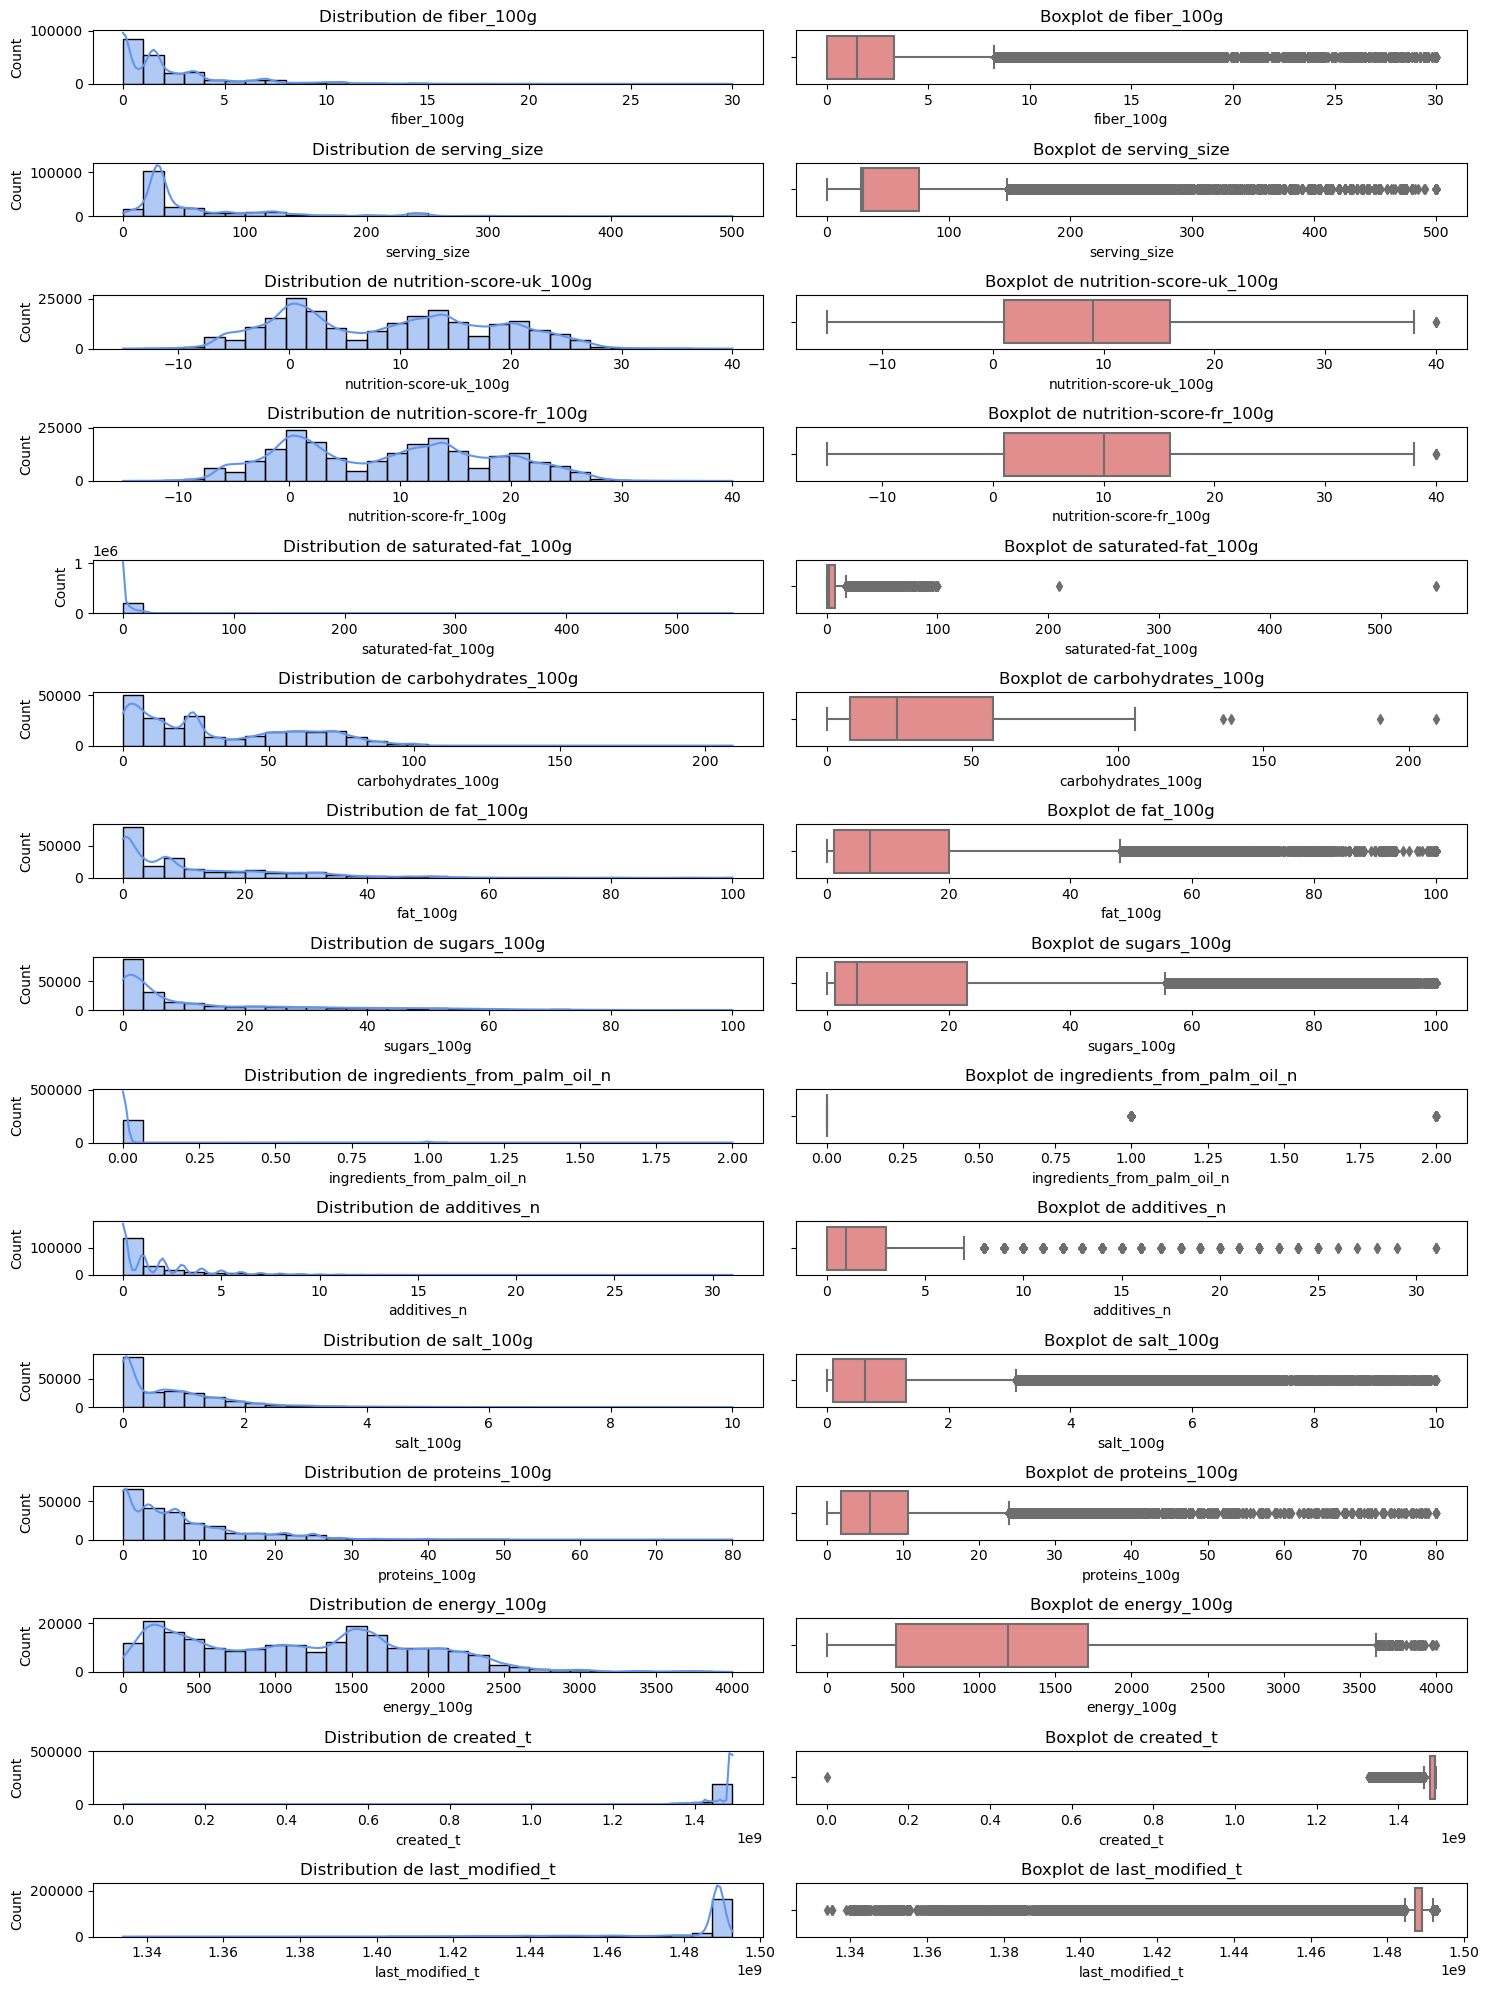

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des variables quantitatives
quantitative_vars = X_clean.select_dtypes(include=['float64', 'int64']).columns

# Taille de la figure
plt.figure(figsize=(15, 20))

# Boucle sur chaque variable pour générer l'histogramme et le boxplot
for idx, var in enumerate(quantitative_vars):
    plt.subplot(len(quantitative_vars), 2, idx * 2 + 1)
    sns.histplot(X_clean[var], bins=30, kde=True, color='cornflowerblue')
    plt.title(f'Distribution de {var}')
    
    plt.subplot(len(quantitative_vars), 2, idx * 2 + 2)
    sns.boxplot(x=X_clean[var], color='lightcoral')
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

Les groupes de corrélation montrent des logiques nutritionnelles : graisses vs graisses saturées, glucides vs sucres, sel vs sodium.

Certains indicateurs sont presque redondants, ce qui pourrait permettre une simplification des variables pour éviter les doublons.

Les scores nutritionnels FR et UK partagent des facteurs communs, ce qui permettrait d'unifier certaines étapes d'analyse.

Conclusion :
Cette matrice de corrélation nous permet de visualiser clairement les relations entre les différentes variables quantitatives. Les fortes corrélations détectées suggèrent qu'un nettoyage pourrait être envisagé pour éviter la redondance, tout en maintenant l'information cruciale. Une étude plus poussée sur les variables influençant directement les scores nutritionnels pourrait également optimiser les prédictions.

Plan d'action :
Supprimer les redondances :

Décider si on garde ou non les variables en double.

Transformer en ratio si cela a du sens (ex: sugars_100g / carbohydrates_100g).

Vérification de la normalisation :

On regarde les distributions après cette transformation.

Recalculer la matrice de corrélation pour observer les changements.

In [7]:
import pandas as pd

# 1️⃣ Chargement du DataFrame propre
X_clean = pd.read_csv('X_clean_final.csv')

# 2️⃣ Suppression des redondances identifiées (si elles existent encore)
print("🗑️ Suppression des redondances...")
colonnes_a_supprimer = ['ingredients_that_may_be_from_palm_oil_n']

# Vérification de l'existence des colonnes avant suppression
colonnes_existe = [col for col in colonnes_a_supprimer if col in X_clean.columns]

if colonnes_existe:
    X_clean.drop(columns=colonnes_existe, inplace=True)
    print(f"✅ Colonnes supprimées : {colonnes_existe}")
else:
    print("⚠️ Aucune colonne à supprimer trouvée.")

# 3️⃣ Création de nouveaux ratios
print("\n🔄 Création de ratios :")
X_clean['sugars_ratio'] = X_clean['sugars_100g'] / X_clean['carbohydrates_100g']
X_clean['saturated_fat_ratio'] = X_clean['saturated-fat_100g'] / X_clean['fat_100g']

# Remplacer les NaN et les infinis par 0 (car si glucides ou gras = 0, le ratio n'a pas de sens)
X_clean['sugars_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)
X_clean['sugars_ratio'].fillna(0, inplace=True)

X_clean['saturated_fat_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)
X_clean['saturated_fat_ratio'].fillna(0, inplace=True)

print("✅ Ratios créés : 'sugars_ratio' et 'saturated_fat_ratio'")

# 4️⃣ Vérification des types de données et des valeurs manquantes
print("\n🔎 Vérification des types de données après transformation :")
print(X_clean.dtypes)

print("\n📌 Vérification des valeurs manquantes :")
print(X_clean.isnull().sum())

# 5️⃣ Sauvegarde du nouveau DataFrame propre
X_clean.to_csv('X_clean_transformed.csv', index=False)
print("\n💾 Sauvegarde du DataFrame transformé dans 'X_clean_transformed.csv' réussie !")

/tmp/ipykernel_1541/3035964052.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  X_clean = pd.read_csv('X_clean_final.csv')


🗑️ Suppression des redondances...
⚠️ Aucune colonne à supprimer trouvée.

🔄 Création de ratios :
✅ Ratios créés : 'sugars_ratio' et 'saturated_fat_ratio'

🔎 Vérification des types de données après transformation :
fiber_100g                     float64
serving_size                   float64
nutrition-score-uk_100g        float64
nutrition-score-fr_100g        float64
saturated-fat_100g             float64
carbohydrates_100g             float64
fat_100g                       float64
sugars_100g                    float64
additives                       object
ingredients_from_palm_oil_n    float64
additives_n                    float64
ingredients_text                object
salt_100g                      float64
proteins_100g                  float64
energy_100g                    float64
brands_tags                     object
brands                          object
product_name                    object
countries_fr                    object
countries_tags                  object
countr

Les redondances ont été traitées et les nouveaux ratios ont été créés.

Visualisation et Analyse des Ratios

Visualiser la distribution des nouveaux ratios (sugars_ratio et saturated_fat_ratio).

Vérifier s'il y a des valeurs extrêmes ou aberrantes.

Comparer ces ratios en fonction du nutrition_grade_fr.

/tmp/ipykernel_1541/3538566695.py:6: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  X_clean = pd.read_csv('X_clean_transformed.csv')
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


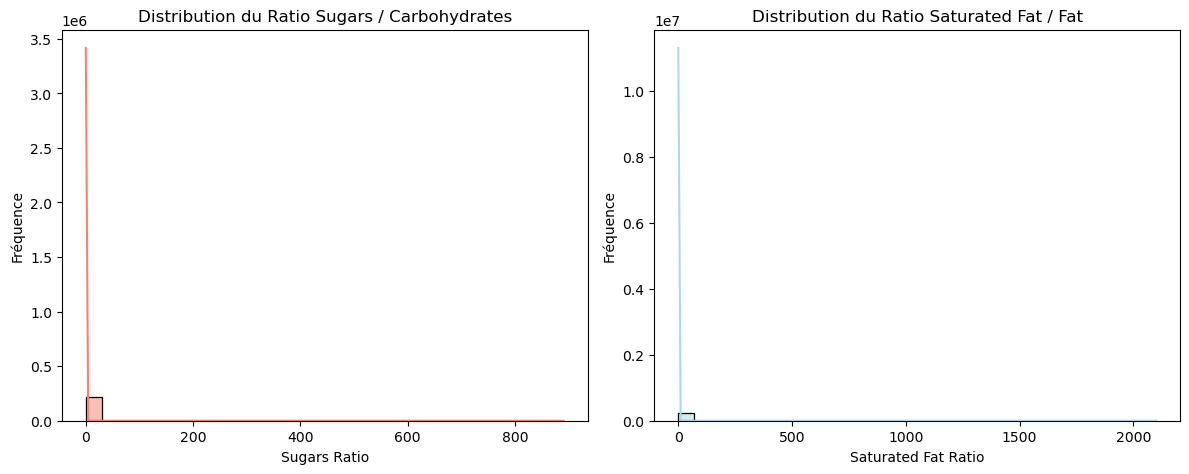

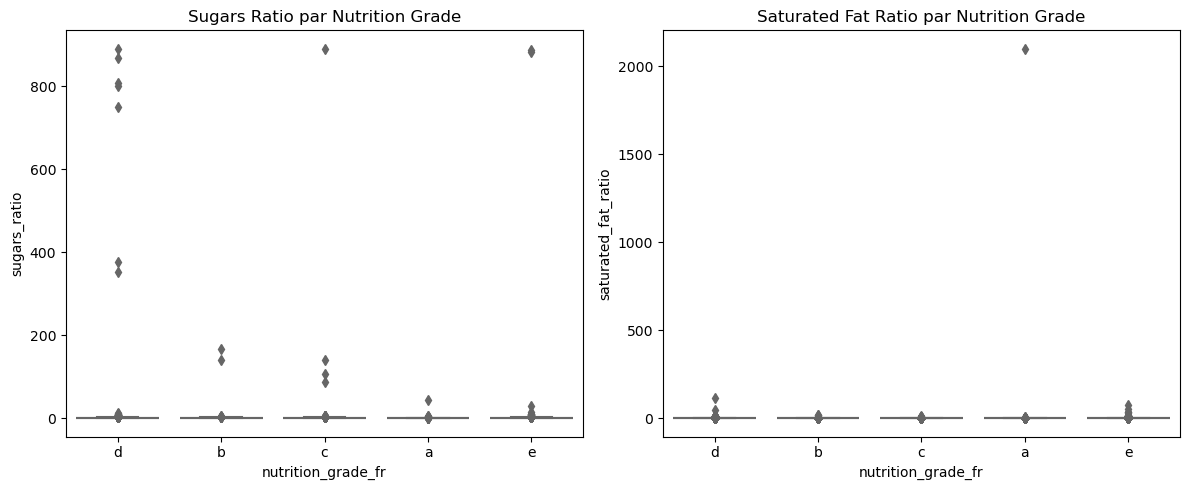

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Chargement du DataFrame transformé
X_clean = pd.read_csv('X_clean_transformed.csv')

# 2️⃣ Visualisation de la distribution des ratios
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_clean['sugars_ratio'], bins=30, kde=True, color='salmon')
plt.title("Distribution du Ratio Sugars / Carbohydrates")
plt.xlabel("Sugars Ratio")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
sns.histplot(X_clean['saturated_fat_ratio'], bins=30, kde=True, color='lightblue')
plt.title("Distribution du Ratio Saturated Fat / Fat")
plt.xlabel("Saturated Fat Ratio")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# 3️⃣ Visualisation par nutrition_grade_fr
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=X_clean['nutrition_grade_fr'], y=X_clean['sugars_ratio'], palette='Set3')
plt.title("Sugars Ratio par Nutrition Grade")

plt.subplot(1, 2, 2)
sns.boxplot(x=X_clean['nutrition_grade_fr'], y=X_clean['saturated_fat_ratio'], palette='Set3')
plt.title("Saturated Fat Ratio par Nutrition Grade")

plt.tight_layout()
plt.show()

On voit clairement que certaines variables sont presque redondantes, et des optimisations peuvent être faites.

Les ratios créés précédemment devraient nous aider à mieux capter l'impact relatif de certaines composantes (gras/saturé, sucres/glucides).

1️_ Corrélations fortes identifiées :

fat_100g ↔ saturated-fat_100g : Ce lien est attendu puisque les graisses saturées font partie des graisses totales. Cette redondance pourrait permettre de réduire l'information en ne conservant qu'une des deux, ou alors de créer un ratio (ce que nous avons déjà fait avec saturated_fat_ratio).

salt_100g ↔ sodium_100g : Corrélation presque parfaite, ce qui est logique étant donné que le sel est majoritairement composé de sodium. Nous avons supprimé cette redondance.

carbohydrates_100g ↔ sugars_100g : Les sucres sont inclus dans les glucides, donc cette corrélation est naturelle.

ingredients_that_may_be_from_palm_oil_n ↔ ingredients_from_palm_oil_n : Cette corrélation indique que lorsque l'un est présent, l'autre l'est souvent aussi.

2️_ Variables influençant les scores nutritionnels :

Les scores nutritionnels FR et UK sont impactés par :

Les graisses totales et les graisses saturées → Plus elles sont élevées, plus le score est mauvais.

Les sucres → Une quantité élevée de sucre influe également négativement.

Les fibres → Influence positive (réduit le score).

L'énergie → Plus le produit est calorique, plus le score peut être mauvais.

MACHINE LEARNING

🔄 Chargement du DataFrame nettoyé...


/tmp/ipykernel_1541/2441981688.py:8: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  X_clean = pd.read_csv('X_clean_transformed.csv')


✅ Dimensions de X_clean : (221210, 34)

🗑️ Suppression des redondances supplémentaires...
✅ Colonnes supprimées : ['sugars_100g', 'saturated-fat_100g']

📊 Visualisation des distributions finales...


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

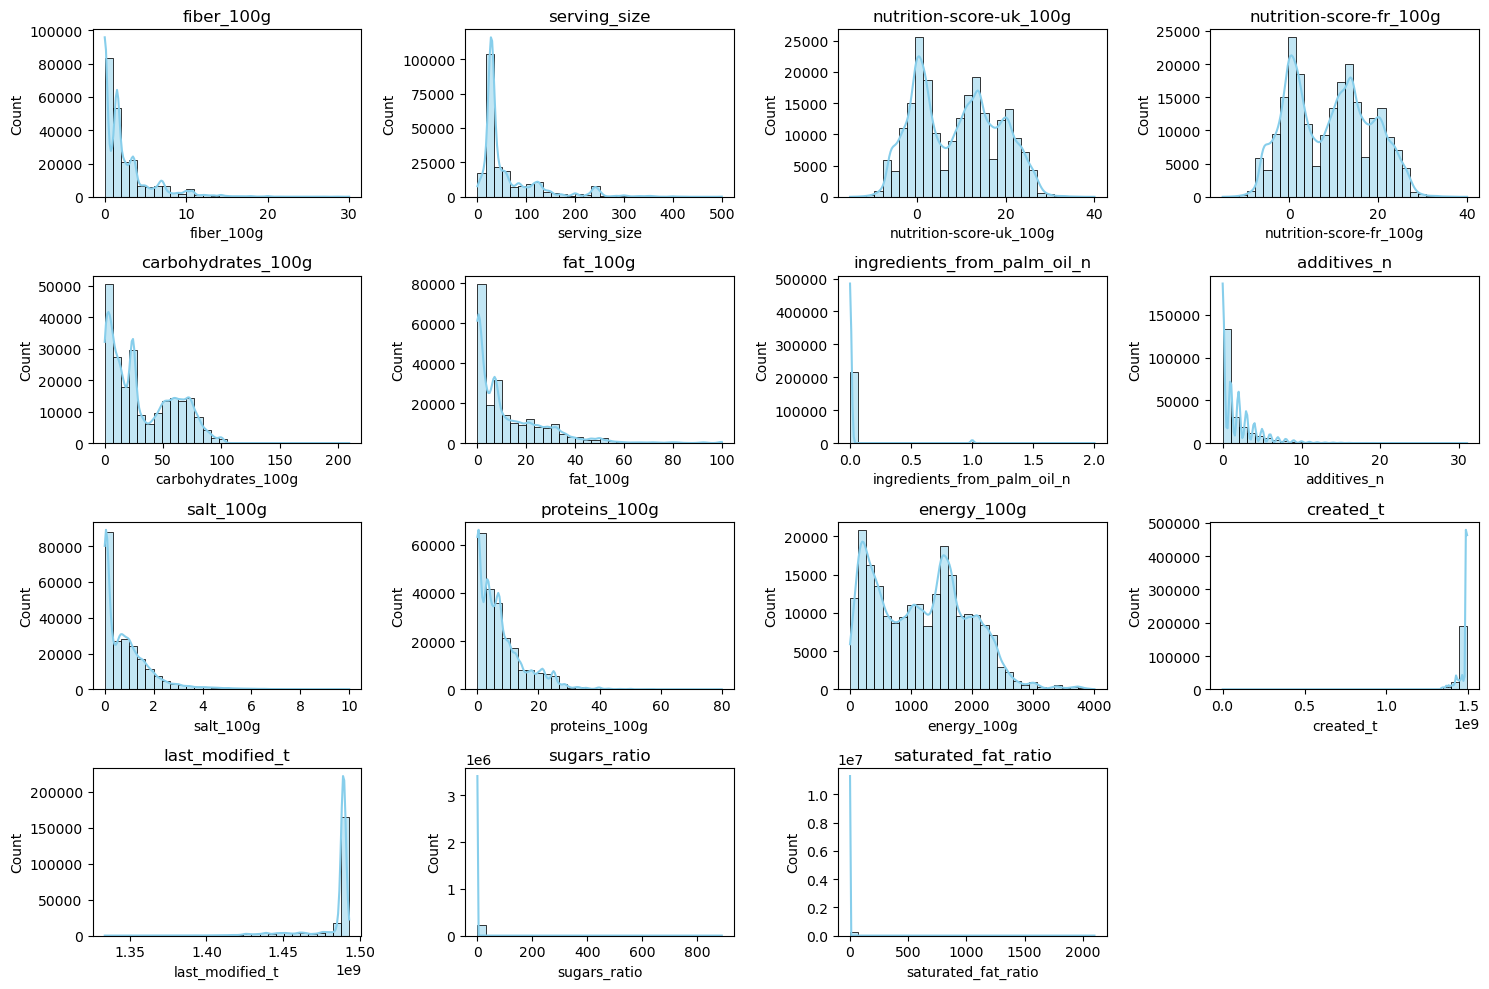


🚀 Préparation pour le Machine Learning...

🔄 Encodage des variables qualitatives...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Chargement du DataFrame nettoyé
print("🔄 Chargement du DataFrame nettoyé...")
X_clean = pd.read_csv('X_clean_transformed.csv')
print(f"✅ Dimensions de X_clean : {X_clean.shape}")

# 2️⃣ Suppression des redondances détectées
print("\n🗑️ Suppression des redondances supplémentaires...")
colonnes_a_supprimer = ['sugars_100g', 'saturated-fat_100g']
X_clean.drop(columns=colonnes_a_supprimer, inplace=True, errors='ignore')
print(f"✅ Colonnes supprimées : {colonnes_a_supprimer}")

# 3️⃣ Visualisation des distributions
print("\n📊 Visualisation des distributions finales...")
variables_quantitatives = X_clean.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_quantitatives):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X_clean[var], bins=30, kde=True, color='skyblue')
    plt.title(var)
plt.tight_layout()
plt.show()

# 4️⃣ Préparation pour le Machine Learning
print("\n🚀 Préparation pour le Machine Learning...")

# Séparation des variables quantitatives et qualitatives
X_quant = X_clean.select_dtypes(include=[np.number])
X_qual = X_clean.select_dtypes(include=['object'])

# Encodage des variables qualitatives
print("\n🔄 Encodage des variables qualitatives...")
X_qual_encoded = pd.get_dummies(X_qual, drop_first=True)

# Assemblage final du DataFrame prêt pour le ML
print("\n🔗 Assemblage final des données...")
X_final = pd.concat([X_quant, X_qual_encoded], axis=1)
print(f"✅ Dimensions après encodage : {X_final.shape}")

# 5️⃣ Sauvegarde du DataFrame final
X_final.to_csv('X_clean_ready_for_ml.csv', index=False)
print("\n💾 Sauvegarde effectuée : 'X_clean_ready_for_ml.csv' est prêt pour le Machine Learning.")

RESUME:

1️_ Chargement du DataFrame :

Lecture de X_clean_transformed.csv.

2️_ Suppression des redondances supplémentaires :

sugars_100g et saturated-fat_100g sont retirées car leurs ratios sont déjà créés.

3️_ Visualisation des distributions finales :

Histogrammes pour observer les distributions des variables quantitatives.

4️_ Préparation pour le Machine Learning :

Séparation des variables qualitatives et quantitatives.

Encodage des variables qualitatives avec One-Hot Encoding.

Assemblage final du DataFrame pour le Machine Learning.

5️_ Sauvegarde du DataFrame :

Sauvegarde du dataset final sous le nom X_clean_ready_for_ml.csv.